FRESHERS ANALYSIS

In [8]:
# DATA LOAD AND EXPLORE

import pandas as pd

In [9]:
df = pd.read_csv(r"C:\Besant\Project\Freshers Job Analysis\Freshers_job_Analysis.csv")
df.head()


,Date,Name,Role,Projects_Finished,Real_Time_Projects,Internship,Educational_Background,Applied Jobs,Getting Interview call,Placement_Statistics (%),Rejection_Reasons,City
0,8/22/2024,Candidate_1,AI/ML Engineer,4,Yes,No,M.Tech,262,23.07,53.39,Lack of skills,Hyderabad
1,1/10/2024,Candidate_2,Python Fullstack Developer,15,Yes,Yes,MCA,216,79.33,85.23,No experience,Chennai
2,4/10/2024,Candidate_3,Python Fullstack Developer,15,Yes,Yes,M.Tech,222,32.80,81.58,No experience,Chennai
3,3/22/2024,Candidate_4,Python Fullstack Developer,15,Yes,No,BCA,139,59.68,72.43,Communication issues,Chennai
4,9/26/2024,Candidate_5,Data Analyst,5,Yes,No,BCA,216,37.25,69.62,Lack of skills,Chennai


In [10]:
df.describe()
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      2500 non-null   object 
 1   Name                      2500 non-null   object 
 2   Role                      2500 non-null   object 
 3   Projects_Finished         2500 non-null   int64  
 4   Real_Time_Projects        2500 non-null   object 
 5   Internship                2500 non-null   object 
 6   Educational_Background    2500 non-null   object 
 7   Applied Jobs              2500 non-null   int64  
 8   Getting Interview call    2500 non-null   float64
 9   Placement_Statistics (%)  2500 non-null   float64
 10  Rejection_Reasons         2500 non-null   object 
 11  City                      2500 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 234.5+ KB


Date                         object
Name                         object
Role                         object
Projects_Finished             int64
Real_Time_Projects           object
Internship                   object
Educational_Background       object
Applied Jobs                  int64
Getting Interview call      float64
Placement_Statistics (%)    float64
Rejection_Reasons            object
City                         object
dtype: object

In [11]:
categorical_colunms = ['Educational_Background','Rejection_Reasons','City']

for col in categorical_colunms :
    print(f"colonm : {col}")
    print(df[col].value_counts())
    print("\n")

colonm : Educational_Background
Educational_Background
B.Tech    1248
MCA        516
M.Tech     496
BCA        240
Name: count, dtype: int64


colonm : Rejection_Reasons
Rejection_Reasons
Lack of skills          1015
No experience            723
Communication issues     513
High competition         249
Name: count, dtype: int64


colonm : City
City
Bangalore    1255
Chennai       749
Hyderabad     496
Name: count, dtype: int64




In [12]:
missing_values = df.isnull().sum()
print(missing_values)


Date                        0
Name                        0
Role                        0
Projects_Finished           0
Real_Time_Projects          0
Internship                  0
Educational_Background      0
Applied Jobs                0
Getting Interview call      0
Placement_Statistics (%)    0
Rejection_Reasons           0
City                        0
dtype: int64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
numerical_data = df.select_dtypes(include=[float, int])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                          Projects_Finished  Applied Jobs  \
Projects_Finished                  1.000000      0.004707   
Applied Jobs                       0.004707      1.000000   
Getting Interview call             0.033540      0.045822   
Placement_Statistics (%)           0.003439      0.025078   

                          Getting Interview call  Placement_Statistics (%)  
Projects_Finished                       0.033540                  0.003439  
Applied Jobs                            0.045822                  0.025078  
Getting Interview call                  1.000000                  0.041172  
Placement_Statistics (%)                0.041172                  1.000000  


VISUALIZATION USING SEABORN & MATPLOTLIB

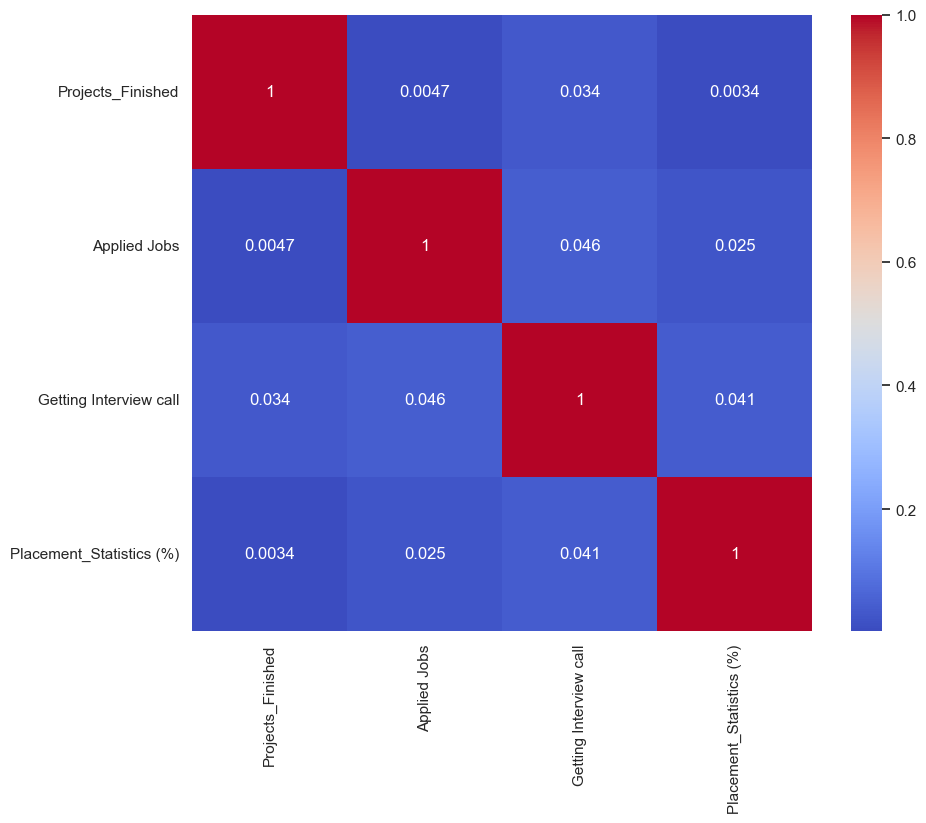

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

C:\Users\hp\AppData\Local\Temp\ipykernel_8688\2087433665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_counts.values, y=role_counts.index, palette="viridis")


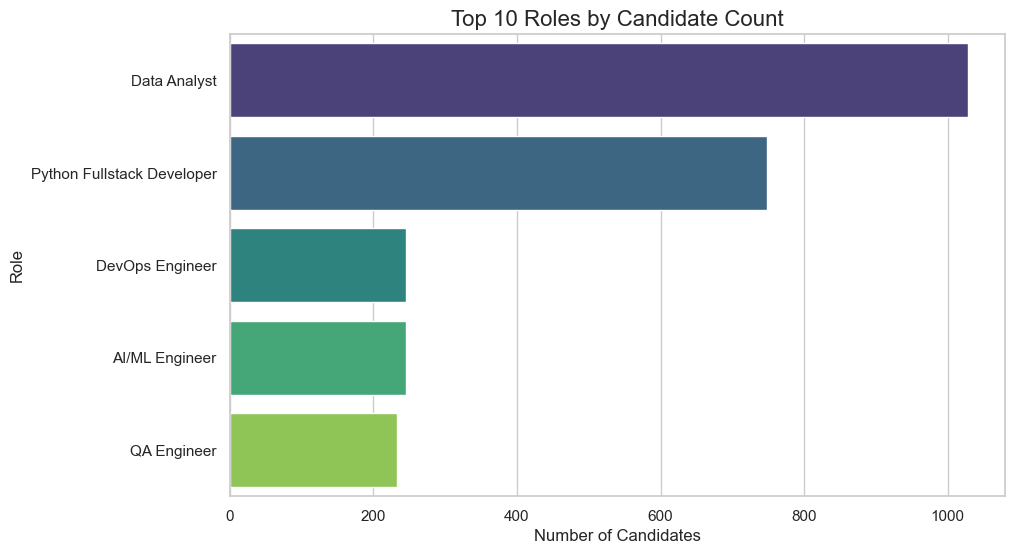

In [ ]:
# Bar Chart: Count of candidates per role
plt.figure(figsize=(10, 6))
role_counts = df['Role'].value_counts().head(10)  # Top 10 roles by count
sns.barplot(x=role_counts.values, y=role_counts.index, palette="viridis")
plt.title("Top 10 Roles by Candidate Count", fontsize=16)
plt.xlabel("Number of Candidates", fontsize=12)
plt.ylabel("Role", fontsize=12)
plt.show()

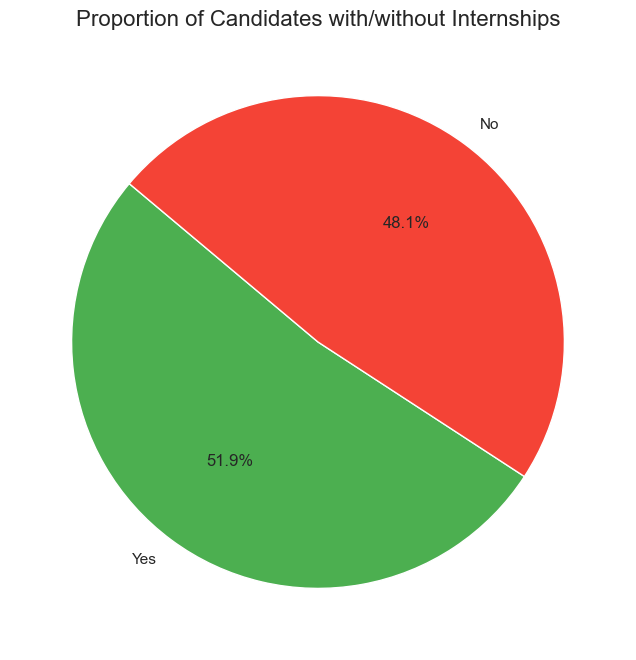

In [18]:
# Pie Chart: Proportion of candidates with/without internships
plt.figure(figsize=(8, 8))
internship_counts = df['Internship'].value_counts()
plt.pie(internship_counts, labels=internship_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4caf50', '#f44336'])
plt.title("Proportion of Candidates with/without Internships", fontsize=16)
plt.show()

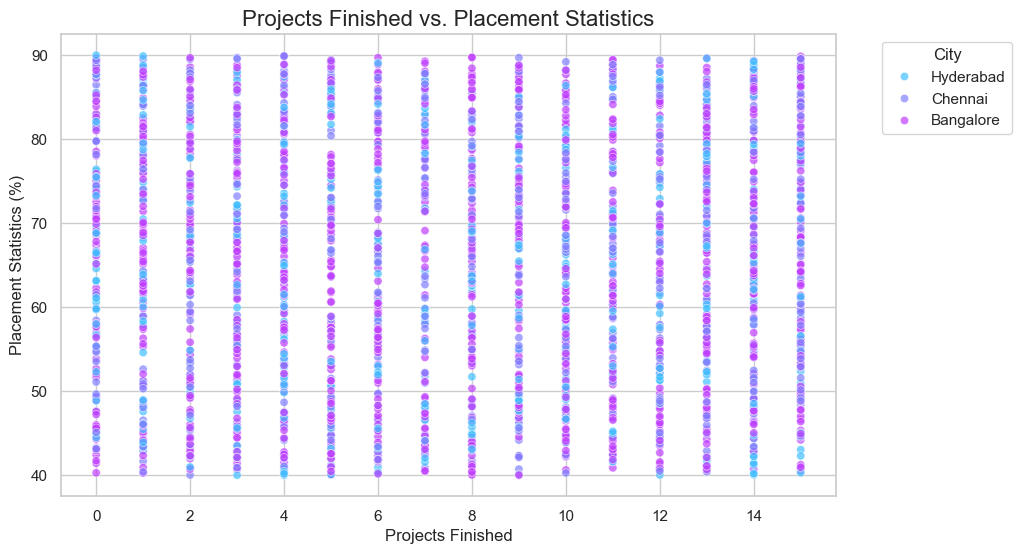

In [19]:
# Scatter Plot: Correlation between "Projects_Finished" and "Placement_Statistics (%)"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Projects_Finished', y='Placement_Statistics (%)', hue='City', palette='cool', alpha=0.7)
plt.title("Projects Finished vs. Placement Statistics", fontsize=16)
plt.xlabel("Projects Finished", fontsize=12)
plt.ylabel("Placement Statistics (%)", fontsize=12)
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

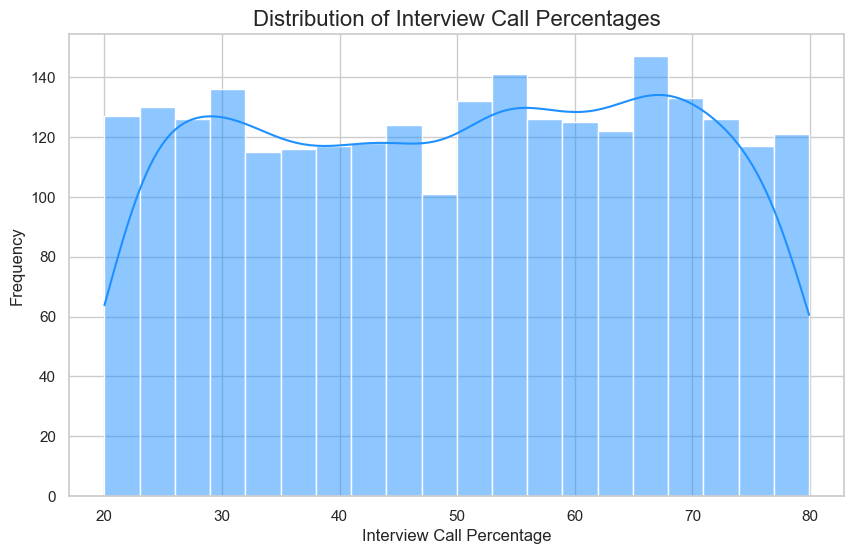

In [21]:
# Histogram: Distribution of "Getting Interview call" percentages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Getting Interview call', bins=20, kde=True, color='dodgerblue')
plt.title("Distribution of Interview Call Percentages", fontsize=16)
plt.xlabel("Interview Call Percentage", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()